# Pacific Summer Water T-S Validation
This notebook compares observed and simulated water mass properties in the Chukchi and Beaufort Seas. 

Start with a comparison of t-s in the beaufort (75N, 210E) using:
1. CM4 pi annual average of year 1 (equivalent to WOA) 
2. CM4 p1 annual average of year 650 (end of pi)
3. CM4 historical mean of annual average for 2000-2014 (end of historical period)








Simulation data are CMIP6-CM4, Odiv-200 and ... Observational data are ...

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob
import xarray as xr

import gsw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cftime
import nc_time_axis
import numpy as np
import cmocean
from datetime import timedelta

## Set up DASK cluster
In dask labextension, create a +NEW cluster. Click the < > widget, scale it to 16 workers and let's go!

## Set paths

In [3]:
# base
base = '/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/'
# CM4 pi
CM4PI = base + 'CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_z_1x1deg/'
# CM4 historical
CM4HI = base + 'CM4_historical/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_z_1x1deg/'

In [4]:
# output directories
CM4PI_dir = CM4PI + 'ts/monthly/5yr/'
CM4HI_dir = CM4HI + 'ts/monthly/5yr/'

## Get file lists

In [5]:
# CM4 pi year 1
filelistCM4_y1 = glob(f'{CM4PI_dir}*0001*.so.nc')
filelistCM4_y1.append(glob(f'{CM4PI_dir}*0001*.thetao.nc'))

In [6]:
# CM4 pi year 650
filelistCM4_y650 = glob(f'{CM4PI_dir}*0650*.so.nc')
filelistCM4_y650.append(glob(f'{CM4PI_dir}*0650*.thetao.nc'))

In [7]:
# CM4 historical years 2000-2014
filelistCM4_y2000 = glob(f'{CM4HI_dir}*.20*.so.nc')
filelistCM4_y2000.append(glob(f'{CM4HI_dir}*.20*.thetao.nc'))

## Read in data

In [ ]:
## CMIP6 CM4 .. 0.25 MOM6, low res atmosphere.
cm4_cmip6_vol = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.volcello.nc',
                             combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol).rename_dims({'yh_sub01':'yh'}).rename({'yh_sub01':'yh'}).squeeze()
cm4_cmip6_salt = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.so.nc',
                             combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol).rename_dims({'yh_sub01':'yh'}).rename({'yh_sub01':'yh'}).squeeze()
cm4_cmip6_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.thetao.nc',
                             combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol).rename_dims({'yh_sub01':'yh'}).rename({'yh_sub01':'yh'}).squeeze()
cm4_cmip6_static = xr.open_dataset('/arch0/cm6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ocean_Drake_Passage.static.nc')


In [ ]:
# CM4 pi year 1
DSCM4_y1 = xr.open_mfdataset(filelistCM4_y1,use_cftime=True,combine='by_coords',
                             engine='netcdf4',drop_variables=['average_DT', 'average_T1', 'average_T2'])

In [ ]:
# CM4 pi year 650
DSCM4_y650 = xr.open_mfdataset(filelistCM4_y650,use_cftime=True,combine='by_coords',
                               engine='netcdf4',drop_variables=['average_DT', 'average_T1', 'average_T2'])

In [ ]:
# CM4 historical years 2000-2014
DSCM4_y2000 = xr.open_mfdataset(filelistCM4_y2000,use_cftime=True,combine='by_coords',engine='netcdf4',drop_variables=['average_DT', 'average_T1', 'average_T2'])

## Open Ocean Static

In [ ]:
# Read in data
DSCM4_OS = xr.open_dataset(CM4PI + 'ocean_annual_z_1x1deg.static.nc', engine='netcdf4')

## Add geographic coordinates to data set

In [33]:
# CM4 pi year 1
DSCM4_y1 = DSCM4_y1.assign_coords({'geolon':DSCM4_OS['geolon'], 'geolat':DSCM4_OS['geolat']}) # tracer points

In [37]:
# CM4 pi year 650
DSCM4_y650 = DSCM4_y650.assign_coords({'geolon':DSCM4_OS['geolon'], 'geolat':DSCM4_OS['geolat']}) # tracer points

In [36]:
# CM4 historical years 2000-2014
DSCM4_y2000 = DSCM4_y2000.assign_coords({'geolon':DSCM4_OS['geolon'], 'geolat':DSCM4_OS['geolat']}) # tracer points

## Scatter plot of T-S

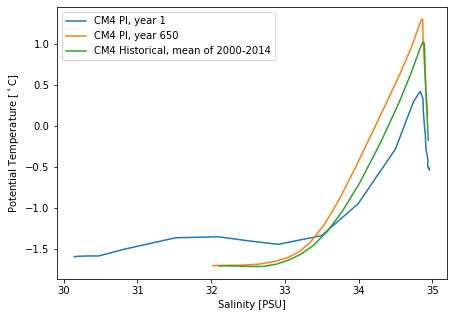

In [64]:
fig = plt.figure(figsize=(7,5))
plt.plot(DSCM4_y1['so'].sel(lat = 75.5, lon = 210.5).isel(time=0),
         DSCM4_y1['thetao'].sel(lat = 75.5, lon = 210.5).isel(time=0),
         label='CM4 PI, year 1')
plt.plot(DSCM4_y650['so'].sel(lat = 75.5, lon = 210.5).isel(time=-1),
         DSCM4_y650['thetao'].sel(lat = 75.5, lon = 210.5).isel(time=-1),
         label='CM4 PI, year 650')
plt.plot(DSCM4_y2000['so'].sel(lat = 75.5, lon = 210.5).mean('time'),
         DSCM4_y2000['thetao'].sel(lat = 75.5, lon = 210.5).mean('time'),
         label='CM4 Historical, mean of 2000-2014')
plt.legend()
plt.xlabel('Salinity [PSU]')
plt.ylabel('Potential Temperature [$^\circ$C]')
plt.show()
# save fig
fig.savefig('../figures/Beaufort_TS.pdf')

## Profiles of T and S

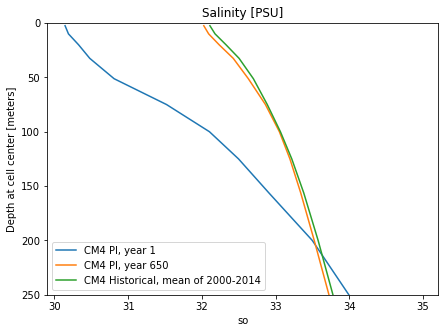

In [65]:
fig = plt.figure(figsize=(7,5))
DSCM4_y1['so'].sel(lat = 75.5, lon = 210.5).isel(time=0).plot(y='z_l',label='CM4 PI, year 1')
DSCM4_y650['so'].sel(lat = 75.5, lon = 210.5).isel(time=-1).plot(y='z_l',label='CM4 PI, year 650')
DSCM4_y2000['so'].sel(lat = 75.5, lon = 210.5).mean('time').plot(y='z_l',label='CM4 Historical, mean of 2000-2014')
plt.ylim(0,250)
plt.gca().invert_yaxis()
plt.gca().legend()
plt.title('Salinity [PSU]')
plt.show()
# save fig
fig.savefig('../figures/Beaufort_S.pdf')

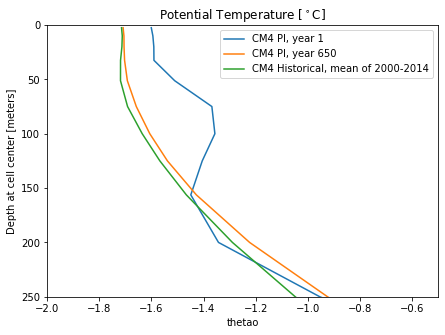

In [66]:
fig = plt.figure(figsize=(7,5))
DSCM4_y1['thetao'].sel(lat = 75.5, lon = 210.5).isel(time=0).plot(y='z_l',label='CM4 PI, year 1')
DSCM4_y650['thetao'].sel(lat = 75.5, lon = 210.5).isel(time=-1).plot(y='z_l',label='CM4 PI, year 650')
DSCM4_y2000['thetao'].sel(lat = 75.5, lon = 210.5).mean('time').plot(y='z_l',label='CM4 Historical, mean of 2000-2014')
plt.ylim(0,250)
plt.xlim(-2,-0.5)
plt.gca().invert_yaxis()
plt.gca().legend()
plt.title('Potential Temperature [$^\circ$C]')
plt.show()
# save fig
fig.savefig('../figures/Beaufort_T.pdf')

In [47]:
### WOA13 product:
WOA13 = xr.open_dataset('/archive/gold/datasets/obs/WOA13/WOA13_ptemp+salinity_monthly_35levels.nc',
                        use_cftime=True,decode_times=False).squeeze()

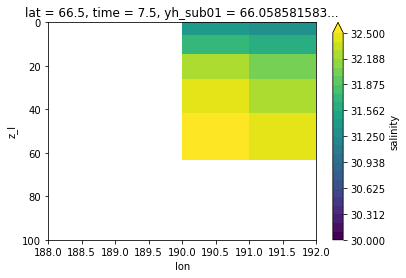

In [79]:
WOA13['salinity'].sel(time=7.5).sel(lat=DSCM4_y1.yh_sub01,method='nearest').sel(
    lon=slice(-171.5+360,-168.5+360)).plot(levels=np.linspace(30,32.5,25))
plt.ylim(0,100)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
rho = gsw.sigma0()